In [1]:
# import library 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas_profiling

In [2]:
df = pd.read_csv('cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

/opt/anaconda3/envs/machinelearning/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/machinelearning/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/machinelearning/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

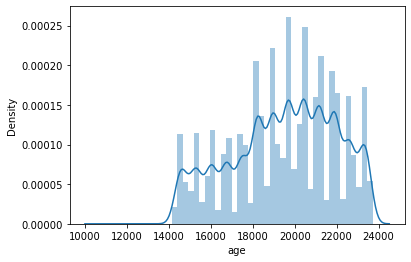

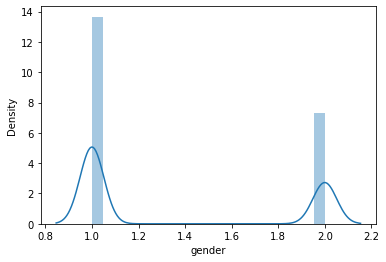

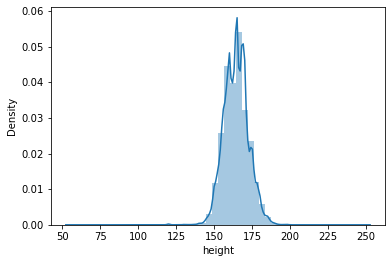

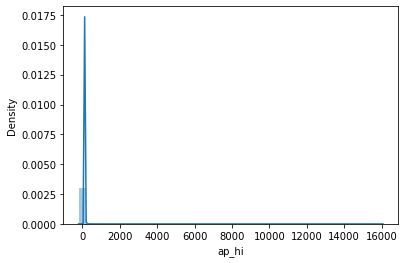

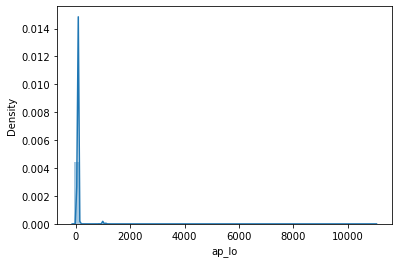

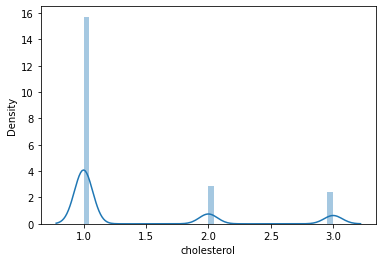

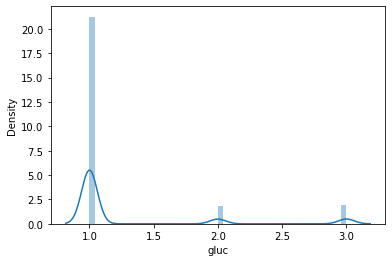

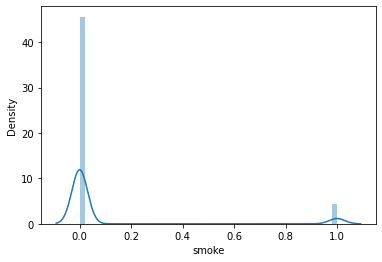

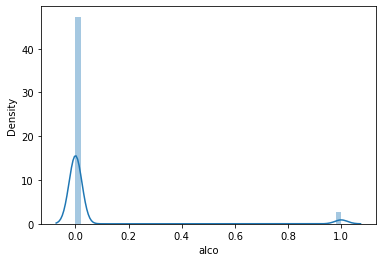

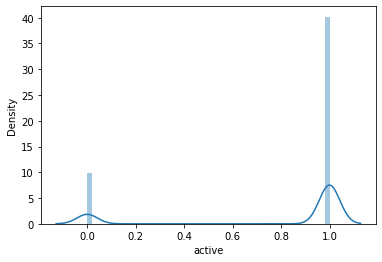

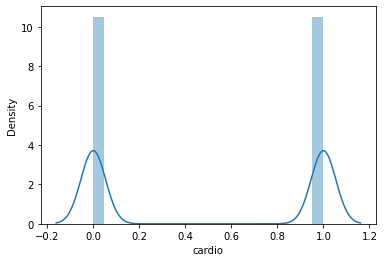

In [4]:
for col in df.iloc[:, 1:13].select_dtypes('int64'):
    plt.figure()
    #sns.displot(df, x=col, kind = 'kde')
    sns.distplot(df[col])

In [5]:
df_corr = df.iloc[:, 1:13]
df_corr
matrice_corr = df_corr.corr(method='spearman').style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'))
matrice_corr

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.0,-0.0202,-0.0823,0.0616,0.219,0.157,0.14,0.0918,-0.0475,-0.0301,-0.0104,0.234
gender,-0.0202,1.0,0.534,0.172,0.0632,0.0664,-0.0357,-0.0189,0.338,0.171,0.00587,0.00811
height,-0.0823,0.534,1.0,0.314,0.0194,0.0305,-0.0589,-0.0244,0.198,0.0967,-0.00737,-0.0124
weight,0.0616,0.172,0.314,1.0,0.278,0.254,0.138,0.11,0.0717,0.0681,-0.0149,0.183
ap_hi,0.219,0.0632,0.0194,0.278,1.0,0.735,0.209,0.105,0.0289,0.0332,-0.00127,0.452
ap_lo,0.157,0.0664,0.0305,0.254,0.735,1.0,0.167,0.0825,0.0262,0.0389,0.0034,0.363
cholesterol,0.14,-0.0357,-0.0589,0.138,0.209,0.167,1.0,0.408,0.0152,0.0413,0.00757,0.215
gluc,0.0918,-0.0189,-0.0244,0.11,0.105,0.0825,0.408,1.0,0.000468,0.0186,-0.00861,0.0915
smoke,-0.0475,0.338,0.198,0.0717,0.0289,0.0262,0.0152,0.000468,1.0,0.34,0.0259,-0.0155
alco,-0.0301,0.171,0.0967,0.0681,0.0332,0.0389,0.0413,0.0186,0.34,1.0,0.0255,-0.00733


In [6]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

X = df.drop(['cardio'], axis='columns')
y = df['cardio']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

rf = RandomForestClassifier(bootstrap=False, n_estimators=20,criterion='gini', max_depth=2, random_state=0)
rf.fit(X_train,  y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [8]:
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7175

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74      6997
           1       0.76      0.63      0.69      7003

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



In [10]:
print("r2_score : " , r2_score(y_test, rf.predict(X_test)))

#print(len(rf.estimators))

r2_score :  -0.13000020755105868


Text(0.5, 0, 'Relative Importance')

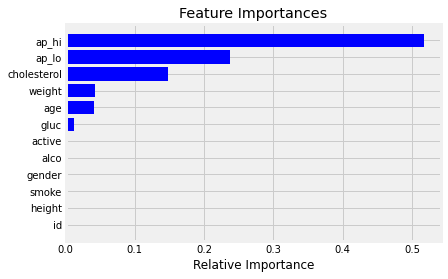

In [11]:
importances = rf.feature_importances_
indices = np.argsort(importances)
liste_invariables = list(df.columns)
# style du graphique 
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [liste_invariables[i] for i in indices])
plt.xlabel('Relative Importance')


In [12]:
# calcule du 3e quantile pour la pression sanguine
import statistics
pr_hi= df.ap_hi.mean()
pr_lo= df.ap_lo.quantile(q=[0.5,0.75]).mean()
imcA= 85/(1.75**2)

In [13]:
X = [[int(53*365.256363051),2,75,85,pr_hi,pr_lo,2,1,0,0,0,imcA]]
print(rf.predict(X))
print(rf.predict_proba(X))

[0]
[[0.67186375 0.32813625]]


On remarque que notre prédiction de Arthur qui n'as pas de problême cardio vasculaire il est a 33% de risque cardiaque

In [17]:
# Grid search 
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV


# Create the parameter grid based on the results of random search 
param_grid = {'n_estimators': np.arange(100, 400, 50),
              'max_depth': np.arange(10, 20, 5), 
              'min_samples_leaf': np.arange(10, 35,5)}

# Create a based model
rf = RandomForestClassifier(random_state = 42)
# Instantiate the grid search model
grid_search = GridSearchCV(rf, param_grid, 
                          cv = 3)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [18]:
print(grid_search.best_params_)

{'max_depth': 15, 'min_samples_leaf': 20, 'n_estimators': 150}


In [19]:
print(grid_search.best_score_)

0.7340893330583004


In [20]:
rf = RandomForestClassifier(bootstrap = True, max_depth= 15, 
                           n_estimators = 150,
                           min_samples_leaf = 20,
                           random_state = 0)
rf.fit(X_train,  y_train)
y_pred = rf.predict(X_test)


In [21]:
accuracy_score(y_test, y_pred)

0.7385714285714285

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6997
           1       0.76      0.70      0.73      7003

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



On remarque une accuracy plus élever de 0.03 % que quand on utilise pas les parametres de GridSrearchCV

### Avec standard Scaler

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(df)

array([[-1.73208045, -0.43606151,  1.36405487, ..., -0.23838436,
         0.49416711, -0.99940018],
       [-1.73204579,  0.30768633, -0.73310834, ..., -0.23838436,
         0.49416711,  1.00060018],
       [-1.73201113, -0.24799666, -0.73310834, ..., -0.23838436,
        -2.02360695,  1.00060018],
       ...,
       [ 1.7338537 , -0.16328642,  1.36405487, ...,  4.19490608,
        -2.02360695,  1.00060018],
       [ 1.73392303,  1.20058905, -0.73310834, ..., -0.23838436,
        -2.02360695,  1.00060018],
       [ 1.73395769,  0.43414373, -0.73310834, ..., -0.23838436,
         0.49416711, -0.99940018]])

In [24]:
X_ = df.drop(['cardio'], axis='columns')
y_ = df['cardio']
Xtrain, Xtest, ytrain, ytest= train_test_split(X_,y_, test_size=0.2)

rf = RandomForestClassifier(bootstrap=False, n_estimators=20,criterion='gini', max_depth=2, random_state=0)
rf.fit(Xtrain,  ytrain)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [25]:
ypred = rf.predict(Xtest)
accuracy_score(ytest, ypred)

0.7150714285714286

In [26]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74      7044
           1       0.76      0.63      0.69      6956

    accuracy                           0.72     14000
   macro avg       0.72      0.71      0.71     14000
weighted avg       0.72      0.72      0.71     14000



In [27]:
print("r2_score : " , r2_score(ytest, rf.predict(Xtest)))

r2_score :  -0.1397593178375378


In [28]:
X1 = [[int(53*365.256363051),2,75,85,pr_hi,pr_lo,2,1,0,0,0,imcA]]
print(rf.predict(X1))
print(rf.predict_proba(X1))

[0]
[[0.6718002 0.3281998]]


malgré l'utilisation du standardScaler l'est résultat sont inchangé, on remarque que le pipline n'apport pas une différence au résultat il est a 26% de risque cardiaque

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.svm import SVC
from sklearn import svm



#fractionner les données
#X_train,X_test,Y_train,Y_test=train_test_split(X, y, test_size=0.2 ,random_state=42)

#choisir le model et le preprocessing
pipe0 = Pipeline([ ('KNN', KNeighborsClassifier(n_neighbors=17))])
pipe1 = Pipeline([ ('LG', LogisticRegression())])
pipe2 = Pipeline([('RF', RandomForestClassifier(max_depth= 15, min_samples_leaf= 20, n_estimators= 250))])
pipe3 = Pipeline([('scaler', StandardScaler()), ('KNN', KNeighborsClassifier(n_neighbors=17))])
pipe4 = Pipeline([('scaler', StandardScaler()), ('LG', LogisticRegression())])
pipe5 = Pipeline([('scaler', StandardScaler()), ('RF', RandomForestClassifier(max_depth= 15, min_samples_leaf = 20, n_estimators= 250))])
pipes = [pipe0, pipe1, pipe2, pipe3, pipe4, pipe5]

In [36]:
def pipe_models():
    ar = []
    tableau = {}
    for pipe in pipes:
        pipe.fit(X_train, y_train)

        #calcul y_pred 
        Y_pred = pipe.predict(X_test)

        #culcule des metrics
        score_test = pipe.score(X_test, y_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        f1_score_0 = f1_score(y_test, y_pred, pos_label=0)
        f1_score_1 = f1_score(y_test, y_pred, pos_label=1)
        resultats = [[score_test,accuracy,precision,f1_score_0,f1_score_1]]
        ar.extend(resultats)

    #creer le dataframe pour afficher un tableau    
    arr = np.array(ar)
    DF = pd.DataFrame(arr, index = ['KNN','LG','RandomForest','KNN + Scaler','LG + scaler','RandomForest + scaler'],
                    columns=['score_test','accuracy','precision','f1_score_0','f1_score_1'])
    return DF

In [37]:
pipe_models()

,score_test,accuracy,precision,f1_score_0,f1_score_1
KNN,0.578143,0.738571,0.740233,0.748902,0.727354
LG,0.701214,0.738571,0.740233,0.748902,0.727354
RandomForest,0.740286,0.738571,0.740233,0.748902,0.727354
KNN + Scaler,0.660929,0.738571,0.740233,0.748902,0.727354
LG + scaler,0.724500,0.738571,0.740233,0.748902,0.727354
RandomForest + scaler,0.738929,0.738571,0.740233,0.748902,0.727354


on remarque que le RandomForest as des score largement plus élever que la LogisticRegression et le KNN